# Shape analysis demo

**Imports**

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import seaborn as sns
sns.set_style('white')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from voytoys.shape.shape import findpt, removeboundaryextrema, \
    Esharp, EsharpN, rdratio, symPT, symRD, PTrsharp, ESRsharp

**Load data**

In [2]:
data = np.load('./exampledata.npy')
Fs = 1000. # Sampling rate (Hz)
t = np.arange(0,30,1/Fs) # Time series (seconds)

# Calculate peaks and troughs

In [3]:
# Identify peaks and troughs
flo = (13,30)
boundaryS = 100

pks, trs = findpt(data, flo, f_lopass = None, Fs = Fs)
pks = removeboundaryextrema(data, pks, boundaryS)
trs = removeboundaryextrema(data, trs, boundaryS)

# Rise-decay ratio (2 measures)

In [4]:
# Calculate rdr
ampPC = 0
rdr = rdratio(data, pks, trs, ampPC=ampPC, Fs=Fs, fosc = flo)

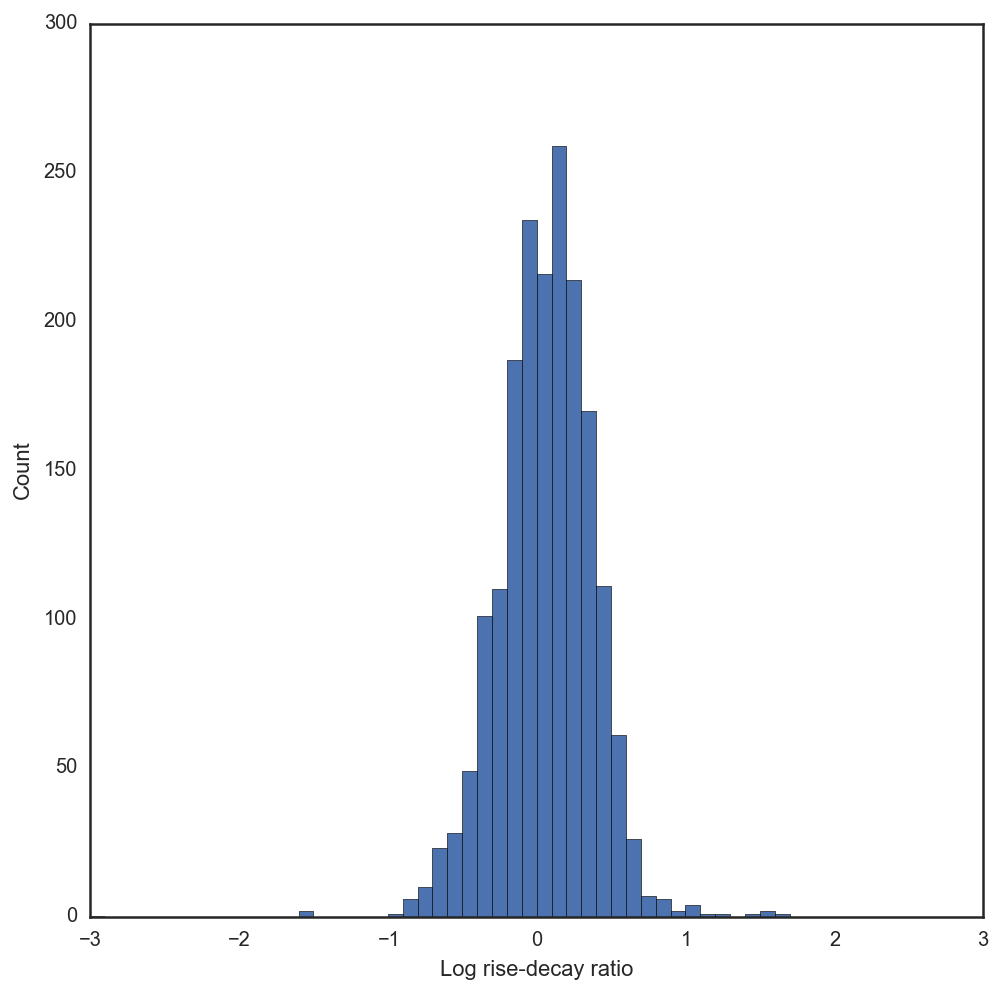

In [5]:
plt.figure(figsize=(8,8))
Nbins=np.arange(-3,3,.1)
plt.hist(np.log10(rdr),Nbins)
plt.xlabel('Log rise-decay ratio')
plt.ylabel('Count')

# Extrema sharpness

In [6]:
# Calculate sharpness
ampPC = 0
widthS = 5
spP = Esharp(data, pks, widthS,ampPC=ampPC, Fs=Fs, fosc = flo)
spT = Esharp(data, trs, widthS,ampPC=ampPC, Fs=Fs, fosc = flo)

Ttest_indResult(statistic=-13.165468372609219, pvalue=1.0343858914097369e-38)


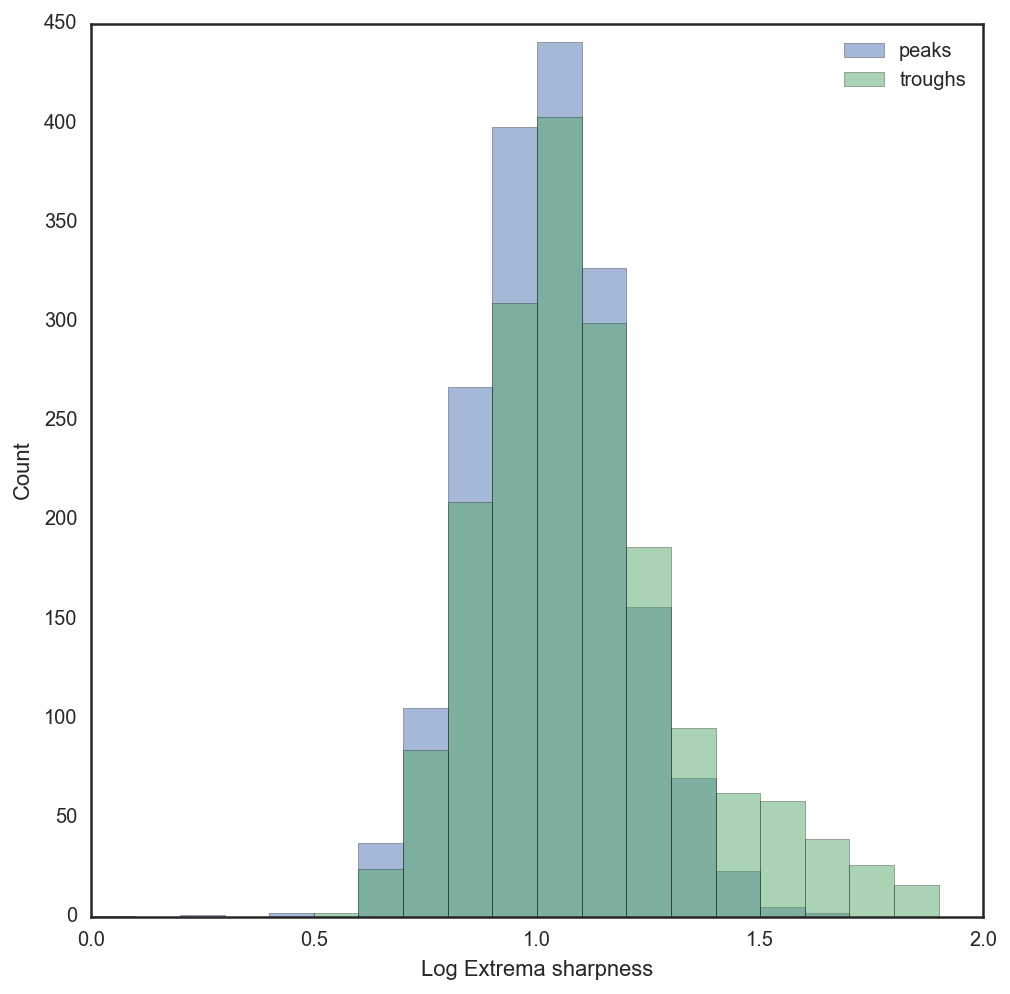

In [7]:
plt.figure(figsize=(8,8))
Nbins=np.arange(0,2,.1)
plt.hist(np.log10(spP),Nbins,label='peaks',alpha=0.5)
plt.hist(np.log10(spT),Nbins,label='troughs',alpha=0.5)
plt.xlabel('Log Extrema sharpness')
plt.ylabel('Count')
plt.legend(loc='best')

print sp.stats.ttest_ind(spP,spT)

# Peak/trough sharpness ratio (ESR)
peak-and-subsequent-trough
Positive Ts = DBS decreases the peak-trough sharpness asymmetry (become more symmetric)

In [8]:
normalize = False
pthent = True
ampPC = 0
widthS = 5

spPTr = PTrsharp(data, pks, trs,widthS, ampPC = ampPC,
                                      Fs = Fs, fosc = flo, normalize = normalize, pthent = pthent)
    
spESR = ESRsharp(data, pks, trs,widthS, ampPC = ampPC,
                                      Fs = Fs, fosc = flo, normalize = normalize, pthent = pthent)

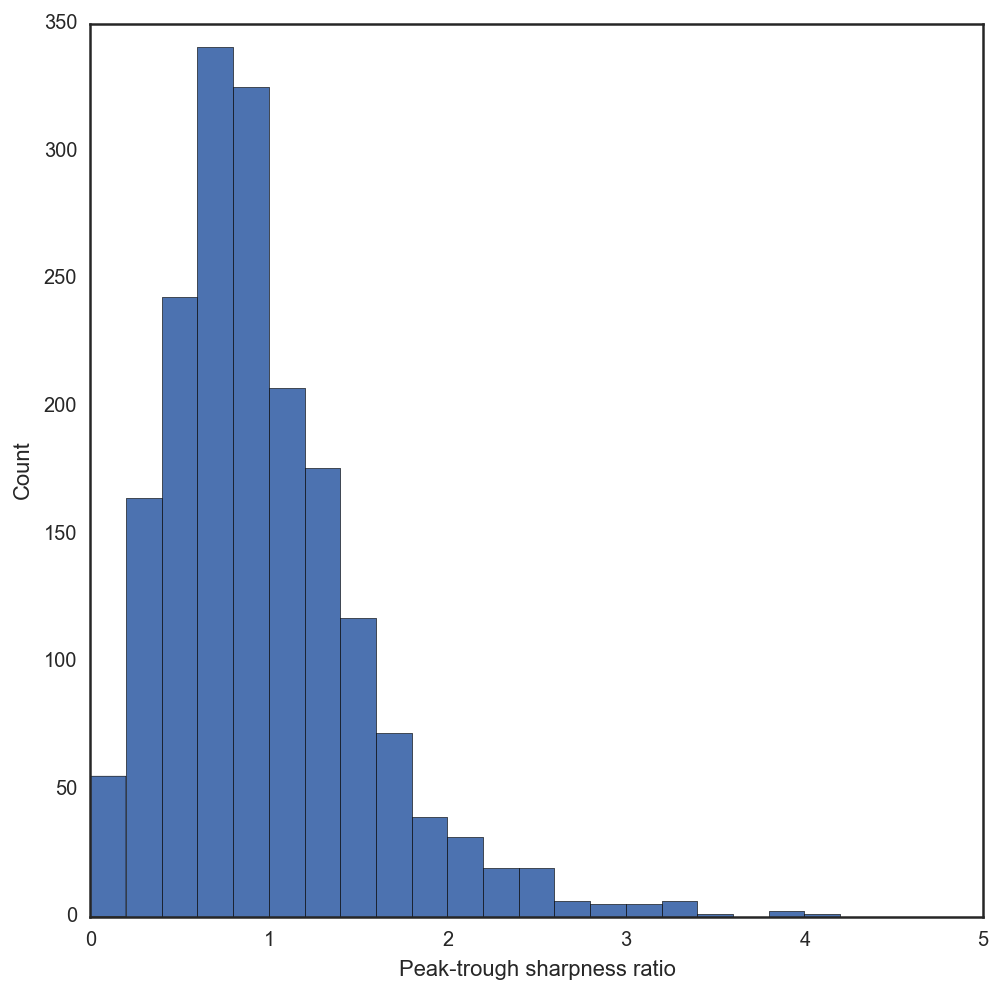

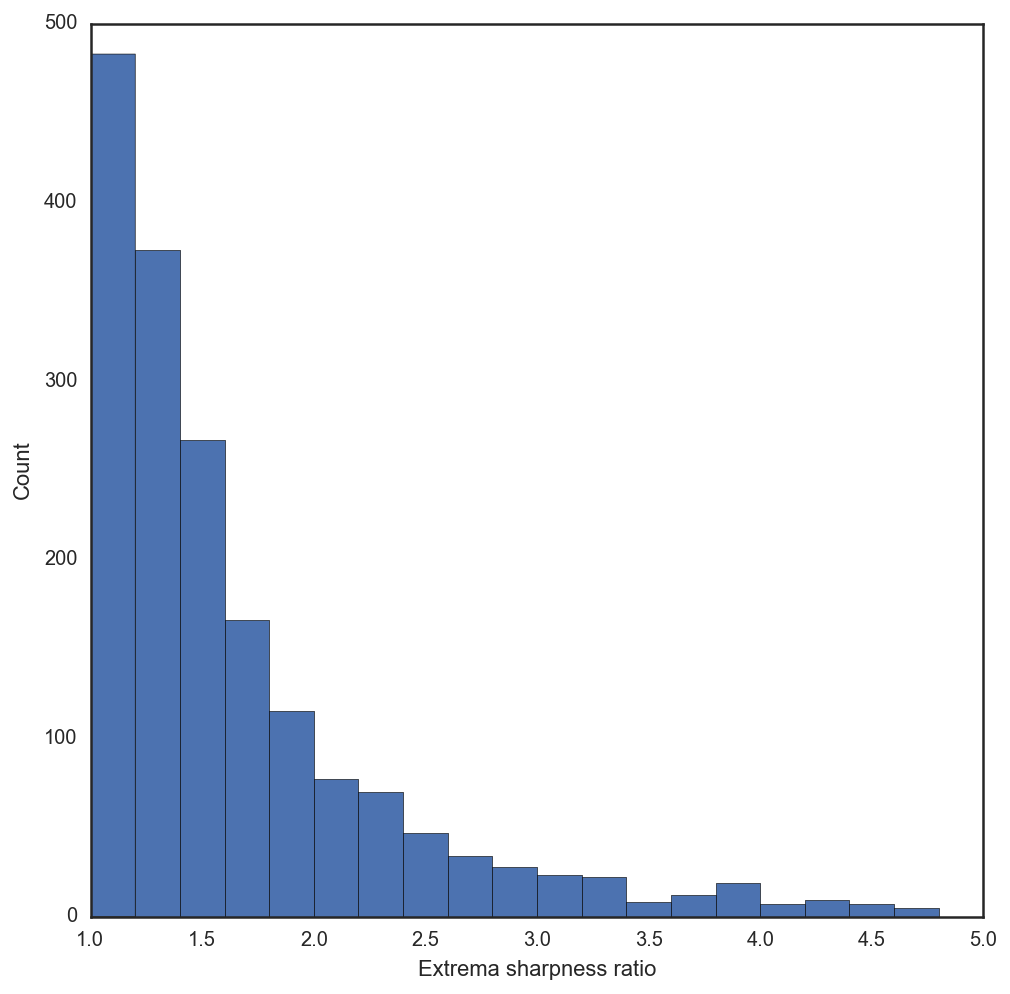

In [9]:
plt.figure(figsize=(8,8))
Nbins=np.arange(0,5,.2)
plt.hist(spPTr,Nbins)
plt.xlabel('Peak-trough sharpness ratio')
plt.ylabel('Count')

plt.figure(figsize=(8,8))
Nbins=np.arange(1,5,.2)
plt.hist(spESR,Nbins)
plt.xlabel('Extrema sharpness ratio')
plt.ylabel('Count')

# Peak-trough asymmetry
Remember 0 = perfectly symmetric

Positive Ts = DBS decreases the peak-trough asymmetry (become more symmetric)

Note that these are log-normal

In [10]:
winsz = 25
ampPC = 90
pthent = True
asymPT = symPT(data, pks, trs, winsz=winsz, ampPC=ampPC, Fs=Fs, fosc=flo, pthent=pthent)

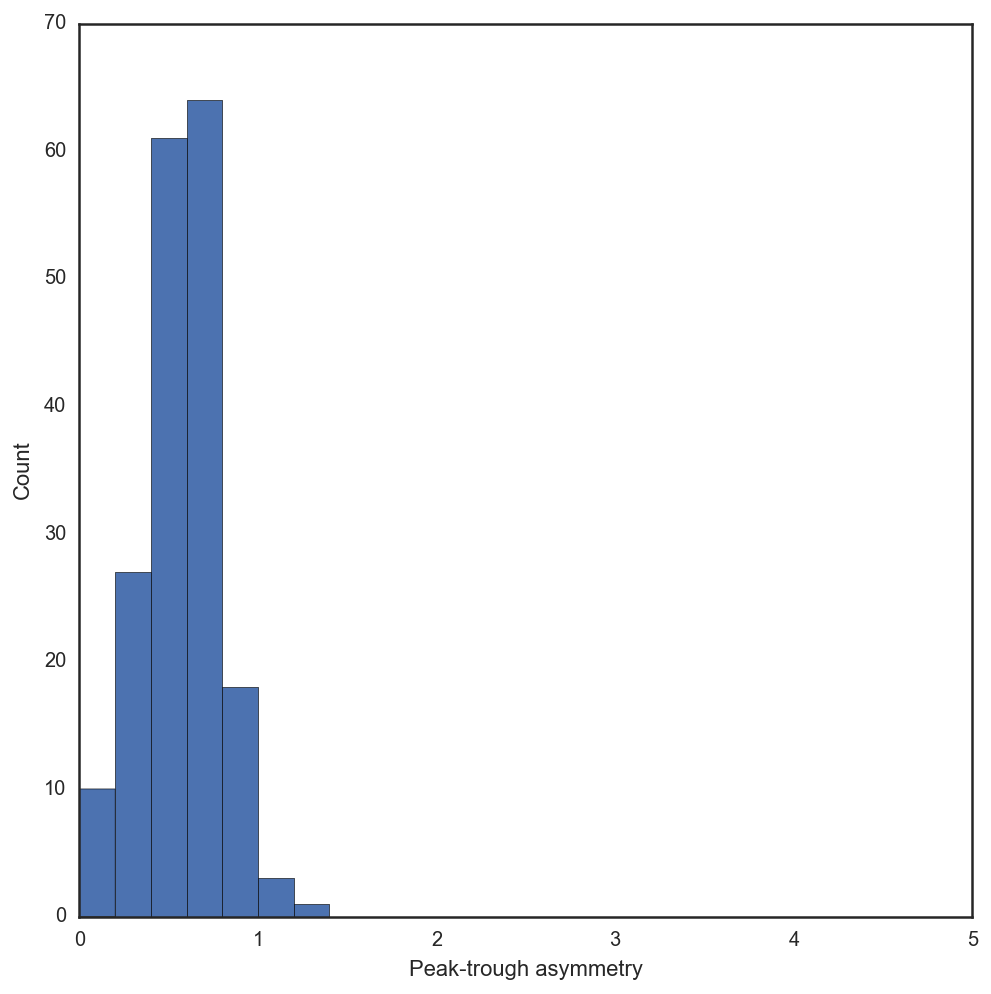

In [11]:
plt.figure(figsize=(8,8))
Nbins=np.arange(0,5,.2)
plt.hist(asymPT,Nbins)
plt.xlabel('Peak-trough asymmetry')
plt.ylabel('Count')

# Rise-decay asymmetry

In [12]:
winsz = 25
ampPC = 90
dthenr = False
asymRD = symRD(data, pks, trs, winsz=winsz, ampPC=ampPC, Fs=Fs, fosc=flo, dthenr=dthenr)

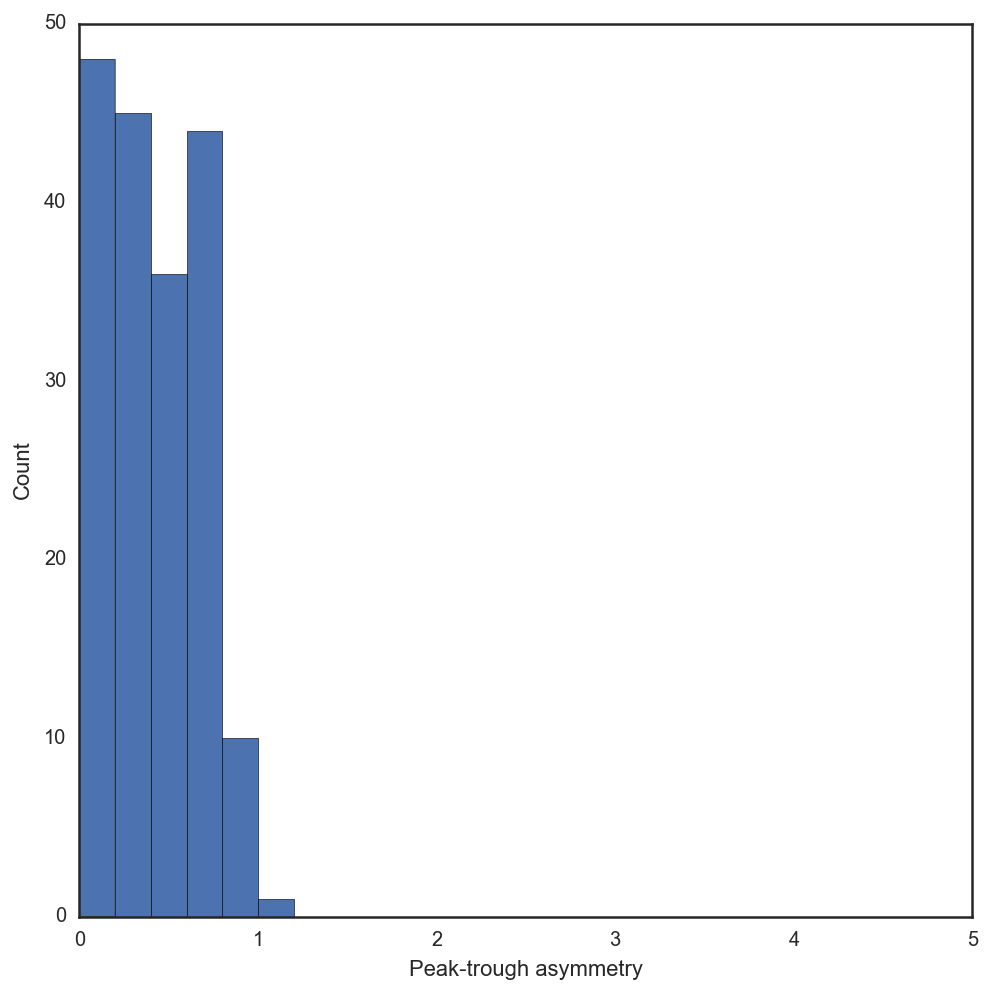

In [13]:
plt.figure(figsize=(8,8))
Nbins=np.arange(0,5,.2)
plt.hist(asymRD,Nbins)
plt.xlabel('Peak-trough asymmetry')
plt.ylabel('Count')